In [144]:
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cross_validation import train_test_split

C:\Users\johng\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [178]:
elite_reviews = pd.read_csv('elite_reviews_scores.csv')

In [4]:
row_reviews = pd.read_csv('row_reviews_scores.csv')

C:\Users\johng\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [180]:
elite_reviews['review_length'] = elite_reviews['text'].apply(lambda x: len(x))

In [181]:
elite_reviews['review_length'].describe()

count    502414.000000
mean        911.852948
std         689.880236
min           4.000000
25%         438.000000
50%         736.000000
75%        1179.000000
max        5228.000000
Name: review_length, dtype: float64

The first quartile, median, and third quartile of the length of the reviews for elite users are all roughly twice as long as the other users reviews.

In [11]:
elite_reviews.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool,# elite years,Positive,Negative,Neutral,Compound,review_length
0,0,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0,6,0.289,0.041,0.671,0.9400,246
1,1,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,6,0.139,0.045,0.817,0.8639,603
2,2,FunI9om-aK5oMIIJmhMlZA,u0LXt3Uea_GidxRW1xcsfg,0W4lkclzZThpx3V65bVgig,4,2011-09-28,a must stop when you are in montreal!\r\n\r\nI...,0,0,0,6,0.190,0.032,0.778,0.9551,424
3,3,K7o5jDInfmX3cY5oH6ATNw,u0LXt3Uea_GidxRW1xcsfg,oWTn2IzrprsRkPfULtjZtQ,3,2012-09-23,Came here for a burger as one of my friends sa...,4,0,0,6,0.208,0.048,0.745,0.8529,309
4,4,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,6,0.111,0.096,0.793,0.4985,1050


In [72]:
elite_reviews['Total Votes'] = elite_reviews['useful'] + elite_reviews['funny'] + elite_reviews['cool']

In [73]:
elite_reviews['Total Votes'].describe()

count    502414.000000
mean          5.640953
std          14.067571
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max        2278.000000
Name: Total Votes, dtype: float64

elite_reviews = elite_reviews[elite_reviews['Total Votes'] > 50]

In [182]:
elite_reviews = elite_reviews[elite_reviews['review_length'] >=400]

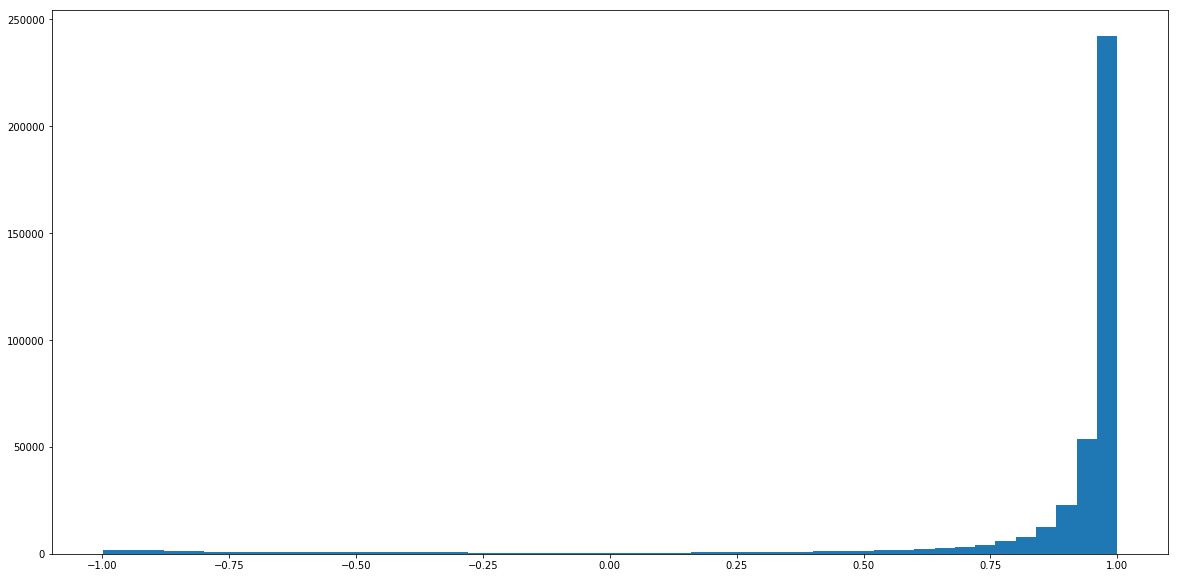

In [183]:
plt.figure(figsize=(20,10))
plt.hist(elite_reviews['Compound'], bins = 50)
plt.show()

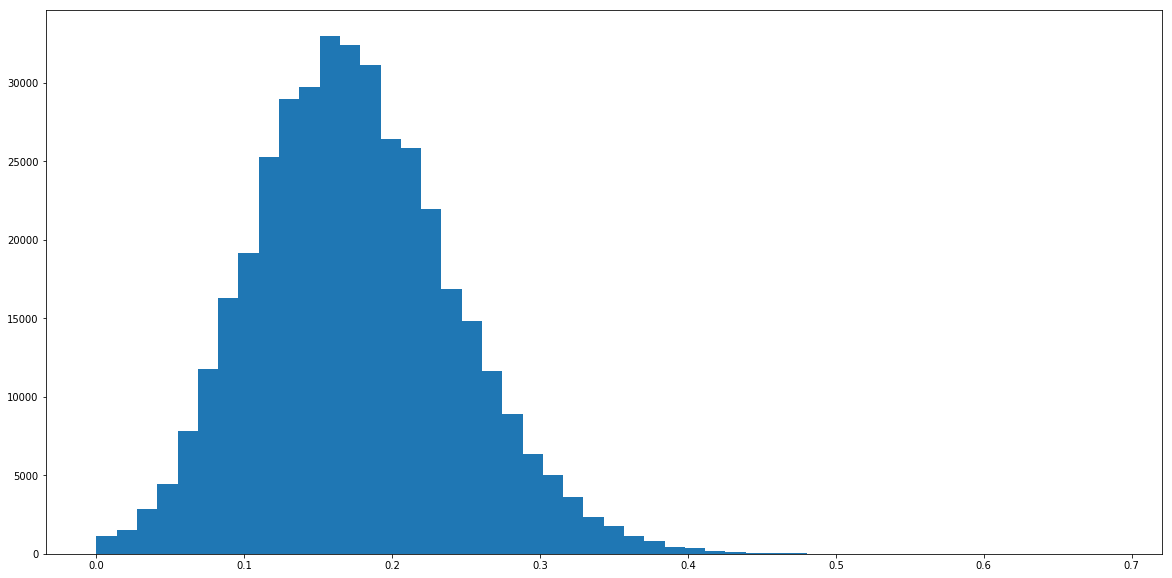

In [184]:
plt.figure(figsize=(20,10))
plt.hist(elite_reviews['Positive'], bins = 50)
plt.show()

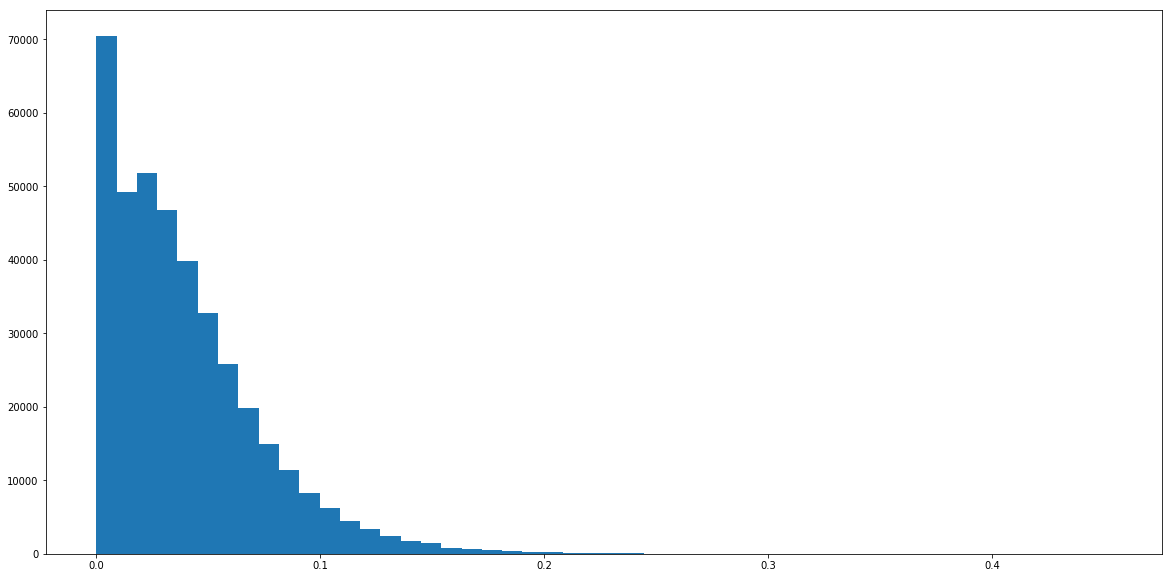

In [185]:
plt.figure(figsize=(20,10))
plt.hist(elite_reviews['Negative'], bins = 50)
plt.show()

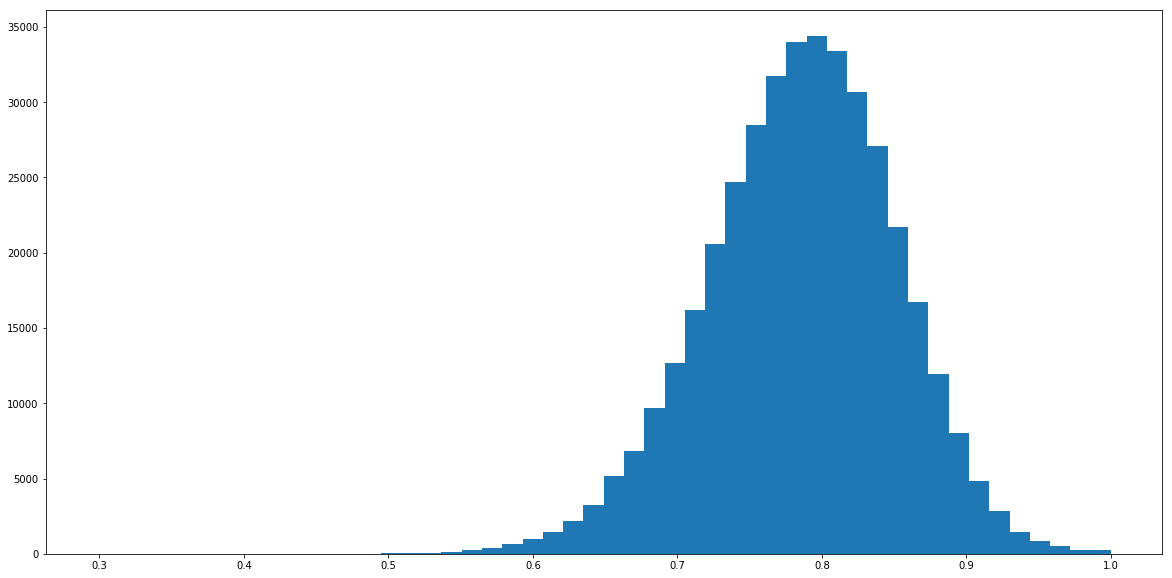

In [186]:
plt.figure(figsize=(20,10))
plt.hist(elite_reviews['Neutral'], bins = 50)
plt.show()

In [192]:
stars1 = elite_reviews[elite_reviews['stars'] == 1]['Positive']
stars2 = elite_reviews[elite_reviews['stars'] == 2]['Positive']
stars3 = elite_reviews[elite_reviews['stars'] == 3]['Positive']
stars4 = elite_reviews[elite_reviews['stars'] == 4]['Positive']
stars5 = elite_reviews[elite_reviews['stars'] == 5]['Positive']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

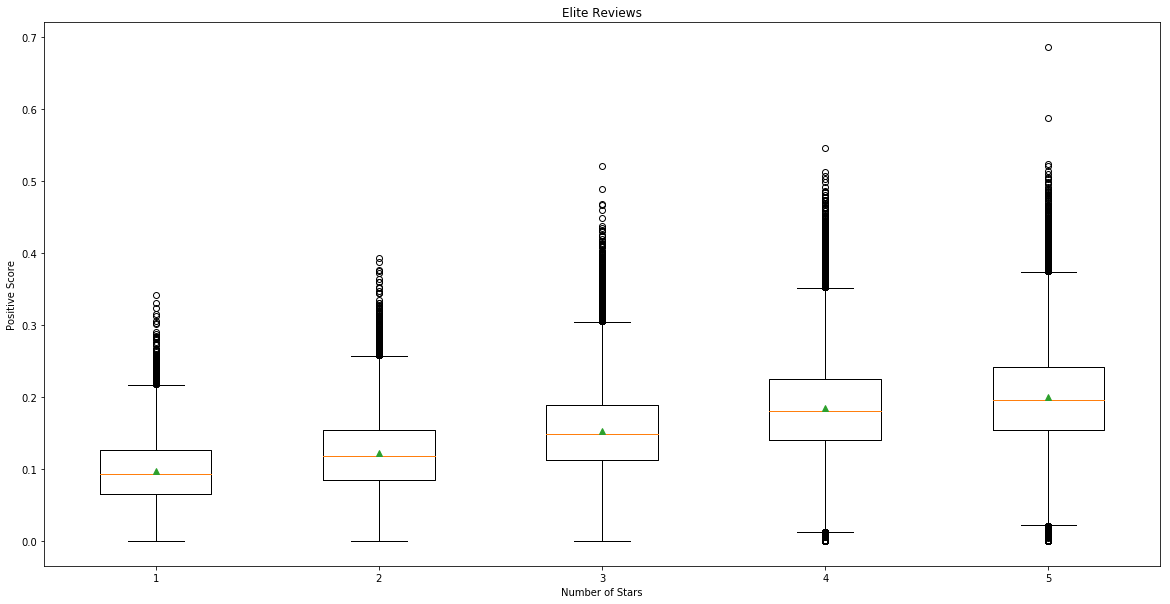

In [193]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('Elite Reviews')
plt.xlabel('Number of Stars')
plt.ylabel('Positive Score')
plt.savefig('eliteposboxplot.png')
plt.show()

In [194]:
stars1 = elite_reviews[elite_reviews['stars'] == 1]['Negative']
stars2 = elite_reviews[elite_reviews['stars'] == 2]['Negative']
stars3 = elite_reviews[elite_reviews['stars'] == 3]['Negative']
stars4 = elite_reviews[elite_reviews['stars'] == 4]['Negative']
stars5 = elite_reviews[elite_reviews['stars'] == 5]['Negative']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

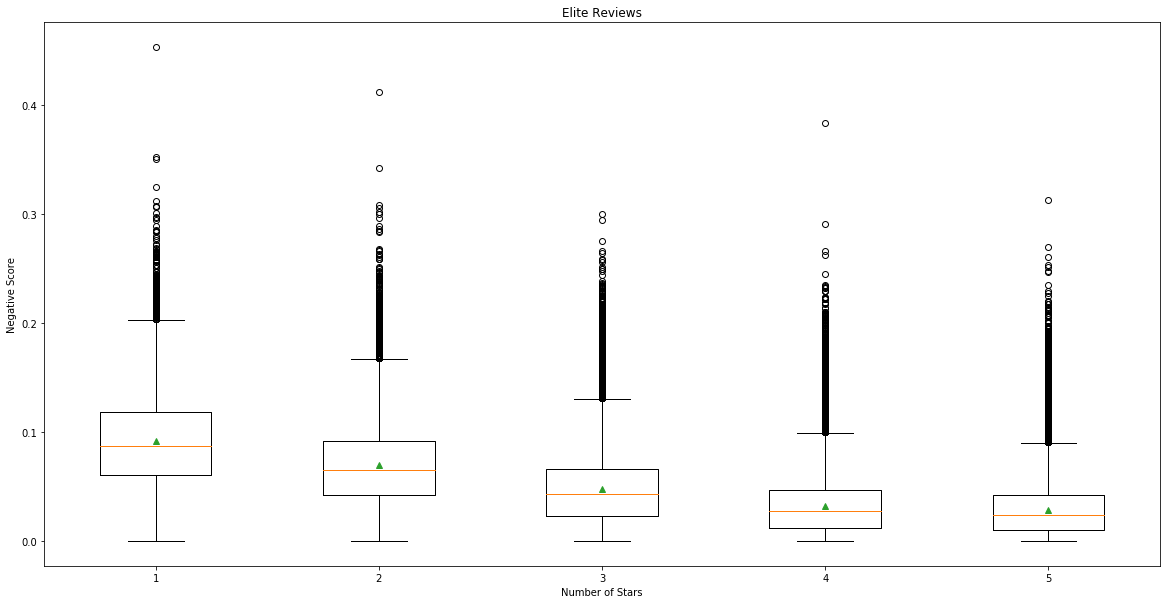

In [195]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('Elite Reviews')
plt.xlabel('Number of Stars')
plt.ylabel('Negative Score')
plt.savefig('elitenegboxplot.png')
plt.show()

In [196]:
stars1 = elite_reviews[elite_reviews['stars'] == 1]['Neutral']
stars2 = elite_reviews[elite_reviews['stars'] == 2]['Neutral']
stars3 = elite_reviews[elite_reviews['stars'] == 3]['Neutral']
stars4 = elite_reviews[elite_reviews['stars'] == 4]['Neutral']
stars5 = elite_reviews[elite_reviews['stars'] == 5]['Neutral']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

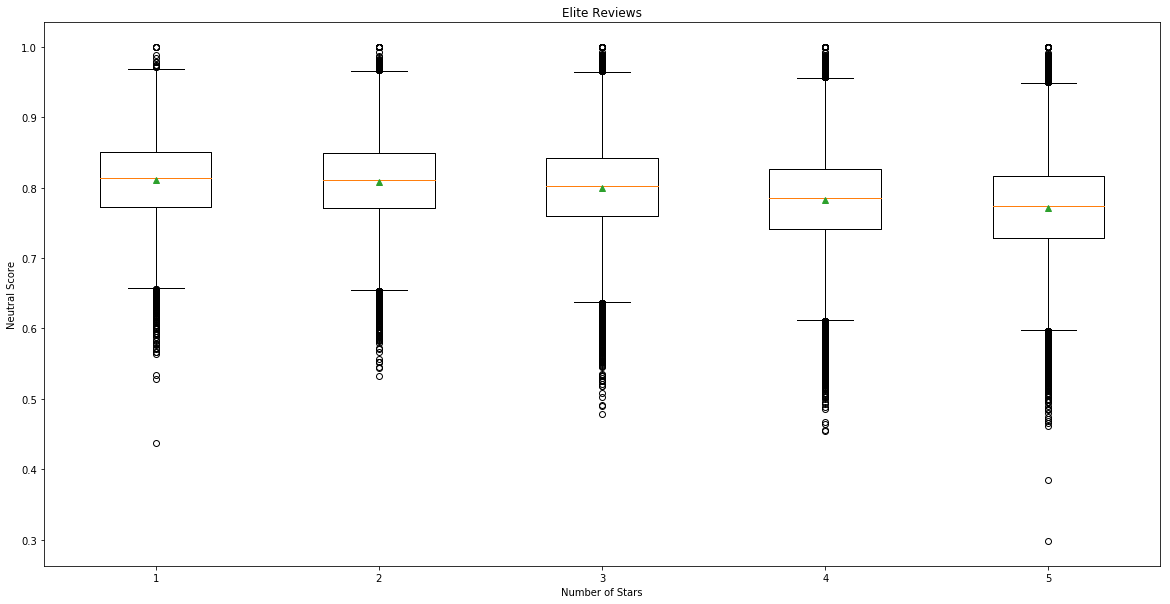

In [197]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('Elite Reviews')
plt.xlabel('Number of Stars')
plt.ylabel('Neutral Score')
plt.savefig('eliteneuboxplot.png')
plt.show()

In [198]:
stars1 = elite_reviews[elite_reviews['stars'] == 1]['Compound']
stars2 = elite_reviews[elite_reviews['stars'] == 2]['Compound']
stars3 = elite_reviews[elite_reviews['stars'] == 3]['Compound']
stars4 = elite_reviews[elite_reviews['stars'] == 4]['Compound']
stars5 = elite_reviews[elite_reviews['stars'] == 5]['Compound']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

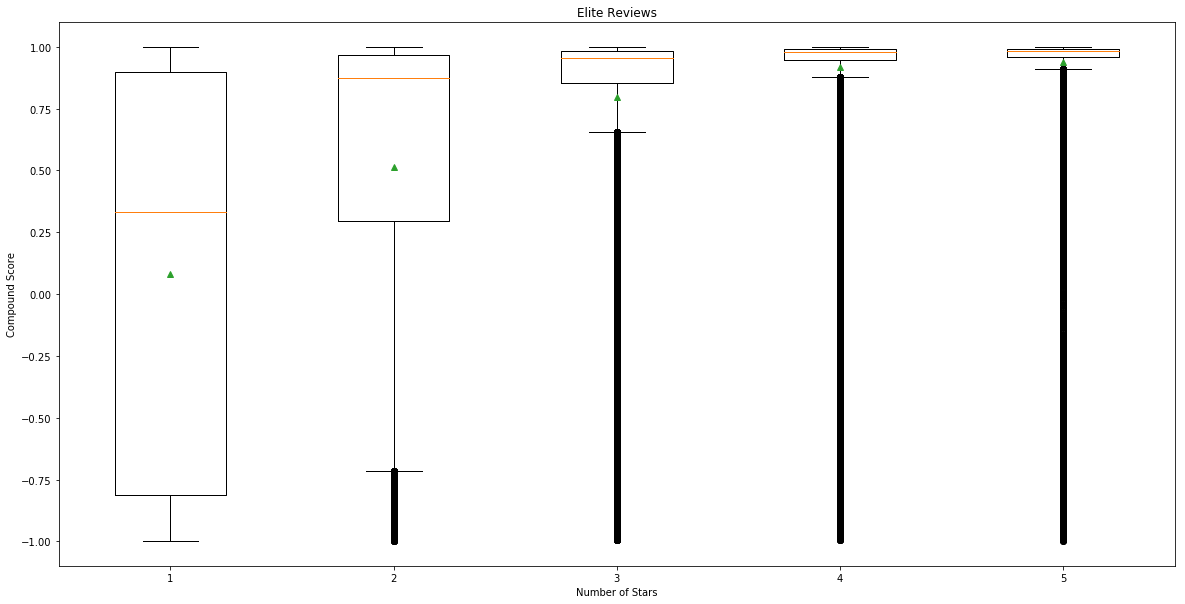

In [199]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('Elite Reviews')
plt.xlabel('Number of Stars')
plt.ylabel('Compound Score')
plt.savefig('elitecompboxplot.png')
plt.show()

In [200]:
elite_reviews.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool,# elite years,Positive,Negative,Neutral,Compound,review_length
1,1,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,6,0.139,0.045,0.817,0.8639,603
2,2,FunI9om-aK5oMIIJmhMlZA,u0LXt3Uea_GidxRW1xcsfg,0W4lkclzZThpx3V65bVgig,4,2011-09-28,a must stop when you are in montreal!\r\n\r\nI...,0,0,0,6,0.190,0.032,0.778,0.9551,424
4,4,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,6,0.111,0.096,0.793,0.4985,1050
5,5,HSR2RLOifd0cvSNVqGXkMQ,u0LXt3Uea_GidxRW1xcsfg,28adZ4lsuUeVB2aWzohK9g,3,2012-10-19,was always intrigued of this place when I pass...,1,0,0,6,0.124,0.033,0.843,0.9706,1347
8,8,Enuk_DJbK0JPmgbFU8ePKw,u0LXt3Uea_GidxRW1xcsfg,N93EYZy9R0sdlEvubu94ig,3,2012-09-23,"Not sure what the hype is, but decided to give...",0,0,0,6,0.138,0.044,0.817,0.7759,409


In [202]:
x_pos = elite_reviews.iloc[:,11].values
x_neg = elite_reviews.iloc[:,12].values
x_neu = elite_reviews.iloc[:,13].values
x_comp = elite_reviews.iloc[:,14].values
y = elite_reviews.iloc[:,4].values.astype(float)

#### Test all 4 sentiment scores

In [203]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)
X

array([[0.139 , 0.045 , 0.817 , 0.8639],
       [0.19  , 0.032 , 0.778 , 0.9551],
       [0.111 , 0.096 , 0.793 , 0.4985],
       ...,
       [0.217 , 0.053 , 0.73  , 0.9886],
       [0.153 , 0.043 , 0.804 , 0.9833],
       [0.288 , 0.    , 0.712 , 0.9854]])

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [205]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.318e+06
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:36:09   Log-Likelihood:            -3.5862e+05
No. Observations:              275941   AIC:                         7.172e+05
Df Residuals:                  275937   BIC:                         7.173e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.8756      0.027    258.214      0.0

In [206]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.789
Variance Score: 0.253


#### Remove compound from model

In [207]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1)), axis = 1)
X

array([[0.139, 0.045, 0.817],
       [0.19 , 0.032, 0.778],
       [0.111, 0.096, 0.793],
       ...,
       [0.217, 0.053, 0.73 ],
       [0.153, 0.043, 0.804],
       [0.288, 0.   , 0.712]])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [209]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.736e+06
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:39:33   Log-Likelihood:            -3.6018e+05
No. Observations:              275941   AIC:                         7.204e+05
Df Residuals:                  275938   BIC:                         7.204e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.7732      0.021    363.355      0.0

In [210]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.798
Variance Score: 0.244


#### Model only pos and neu

In [211]:
X = np.concatenate((x_pos.reshape(-1,1),x_neu.reshape(-1,1)), axis = 1)
X

array([[0.139, 0.817],
       [0.19 , 0.778],
       [0.111, 0.793],
       ...,
       [0.217, 0.73 ],
       [0.153, 0.804],
       [0.288, 0.712]])

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [213]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 2.460e+06
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:40:29   Log-Likelihood:            -3.6760e+05
No. Observations:              275941   AIC:                         7.352e+05
Df Residuals:                  275939   BIC:                         7.352e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.1918      0.022    377.526      0.0

In [214]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.844
Variance Score: 0.201


#### Model only compound

In [215]:
X = x_comp
X

array([0.8639, 0.9551, 0.4985, ..., 0.9886, 0.9833, 0.9854])

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [217]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 1.568e+06
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:40:38   Log-Likelihood:            -5.1054e+05
No. Observations:              275941   AIC:                         1.021e+06
Df Residuals:                  275940   BIC:                         1.021e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.9604      0.003   1252.324      0.0

In [218]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 2.355
Variance Score: -1.228


Scatter plot stars vs each of the sentiment scores

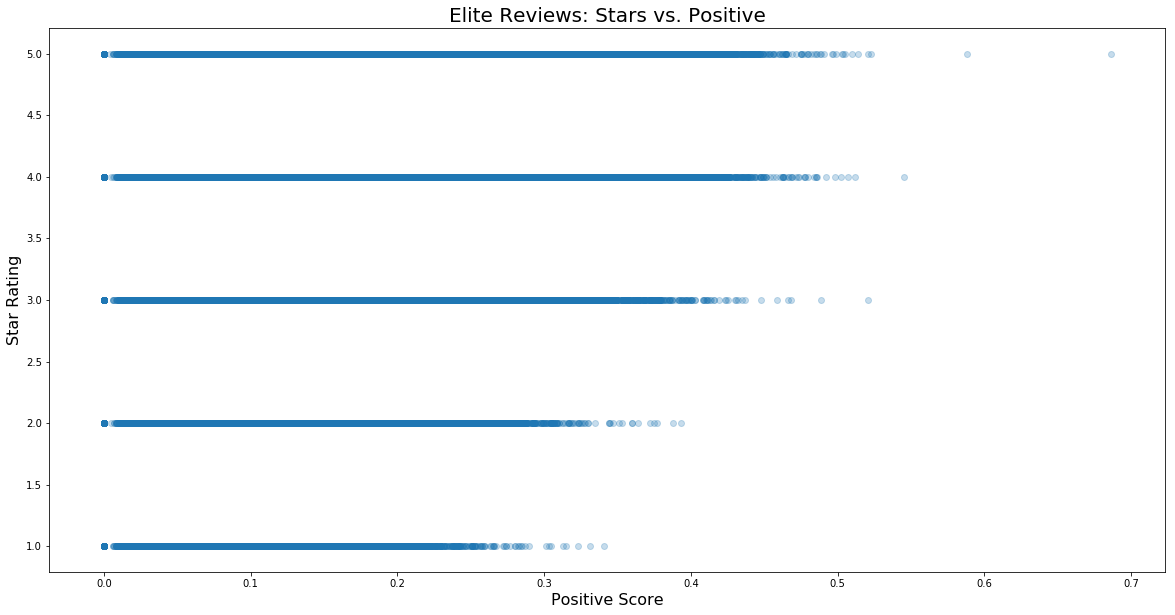

In [241]:
plt.figure(figsize=(20,10))
plt.title('Elite Reviews: Stars vs. Positive', fontsize = 20)
plt.xlabel('Positive Score', fontsize = 16)
plt.ylabel('Star Rating', fontsize = 16)
plt.scatter(elite_reviews['Positive'], elite_reviews['stars'], alpha = 0.25)
plt.savefig('elitestarspos.png')
plt.show()

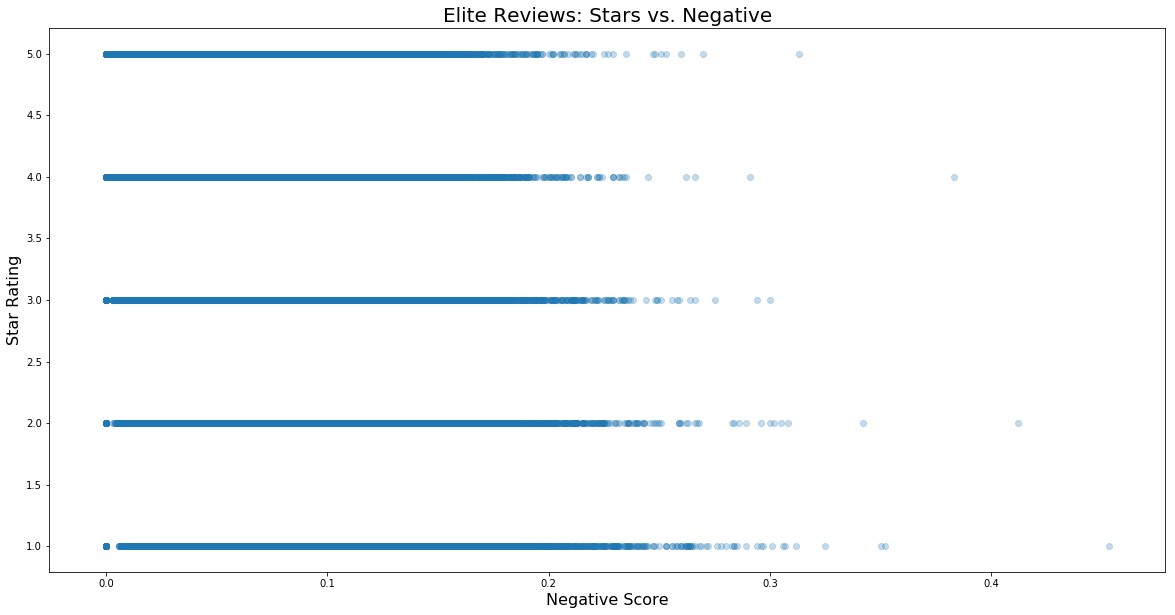

In [242]:
plt.figure(figsize=(20,10))
plt.title('Elite Reviews: Stars vs. Negative', fontsize = 20)
plt.xlabel('Negative Score', fontsize = 16)
plt.ylabel('Star Rating', fontsize = 16)
plt.scatter(elite_reviews['Negative'], elite_reviews['stars'], alpha = 0.25)
plt.savefig('elitestarsneg.png')
plt.show()

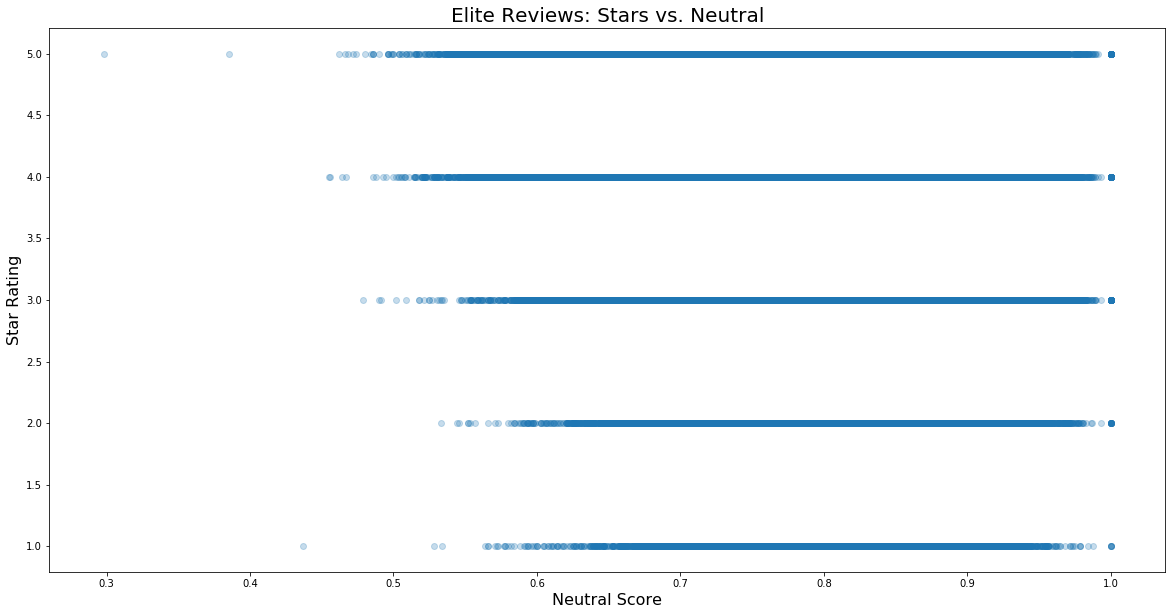

In [238]:
plt.figure(figsize=(20,10))
plt.title('Elite Reviews: Stars vs. Neutral', fontsize = 20)
plt.xlabel('Neutral Score', fontsize = 16)
plt.ylabel('Star Rating', fontsize = 16)
plt.scatter(elite_reviews['Neutral'], elite_reviews['stars'], alpha = 0.25)
plt.savefig('elitestarsneu.png')
plt.show()

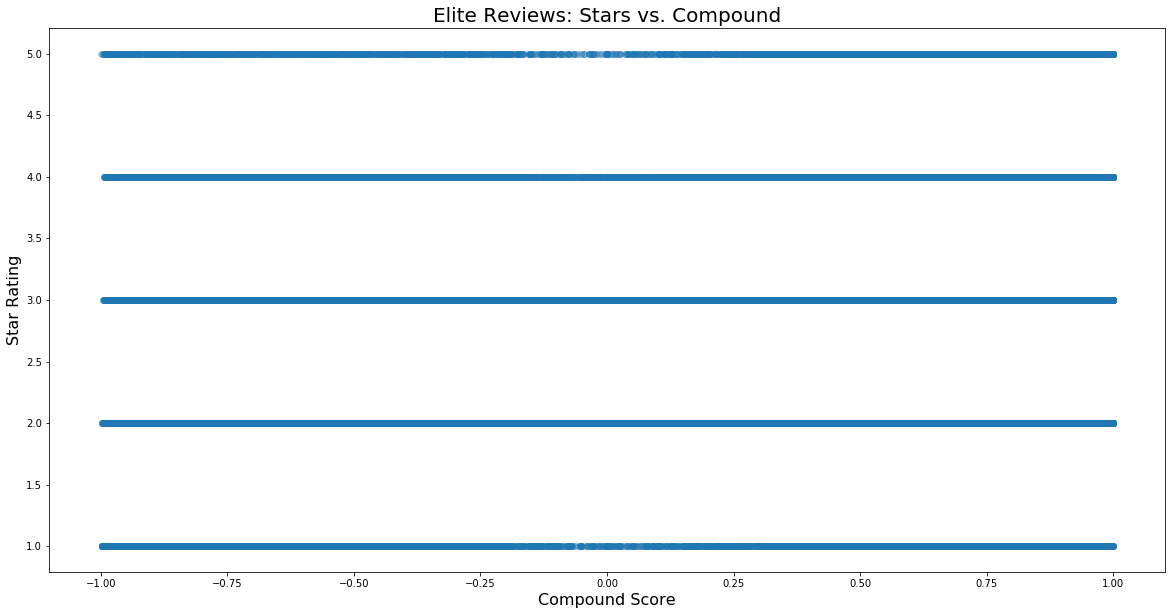

In [240]:
plt.figure(figsize=(20,10))
plt.title('Elite Reviews: Stars vs. Compound', fontsize = 20)
plt.xlabel('Compound Score', fontsize = 16)
plt.ylabel('Star Rating', fontsize = 16)
plt.scatter(elite_reviews['Compound'], elite_reviews['stars'], alpha = 0.25)
plt.savefig('elitestarscomp.png')
plt.show()

## Average scores for each business

In [243]:
avg_elite_reviews = pd.DataFrame(elite_reviews.groupby('business_id')[['stars','Positive','Negative','Neutral','Compound']].mean())
avg_elite_reviews

,stars,Positive,Negative,Neutral,Compound
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.136729,0.197434,0.037169,0.765410,0.906621
--cZ6Hhc9F7VkKXxHMVZSQ,3.918605,0.182837,0.028372,0.788814,0.899269
-050d_XIor1NpCuWkbIVaQ,4.030769,0.175585,0.036226,0.788246,0.900974
-0qht1roIqleKiQkBLDkbw,3.404255,0.154085,0.044894,0.800957,0.817043
-1UMR00eXtwaeh59pEiDjA,3.800000,0.172982,0.041673,0.785345,0.811022
-1xuC540Nycht_iWFeJ-dw,4.271028,0.157804,0.037364,0.804822,0.801024
-2ToCaDFpTNmmg3QFzxcWg,2.325000,0.085975,0.061600,0.852425,0.246950
-3zffZUHoY8bQjGfPSoBKQ,4.083333,0.183006,0.030372,0.786639,0.897229
-4TMQnQJW1yd6NqGRDvAeA,4.188679,0.208943,0.032057,0.759075,0.943258


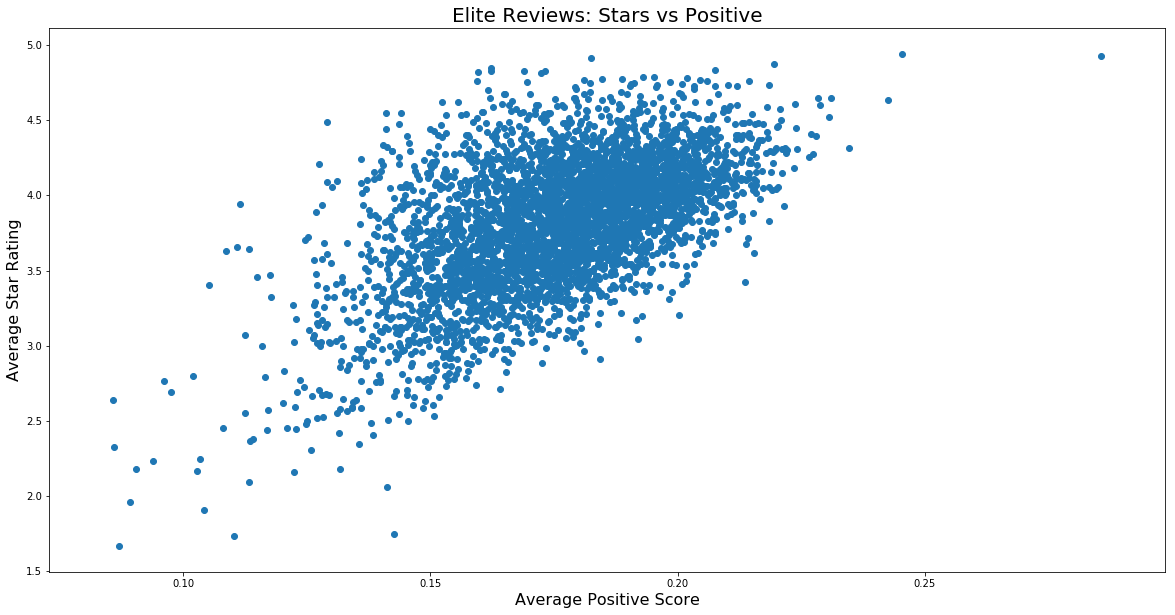

In [245]:
plt.figure(figsize=(20,10))
plt.scatter(avg_elite_reviews['Positive'], avg_elite_reviews['stars'])
plt.title('Elite Reviews: Stars vs Positive', fontsize = 20)
plt.xlabel('Average Positive Score', fontsize = 16)
plt.ylabel('Average Star Rating', fontsize = 16)
plt.savefig('avgelitepos.png')
plt.show()

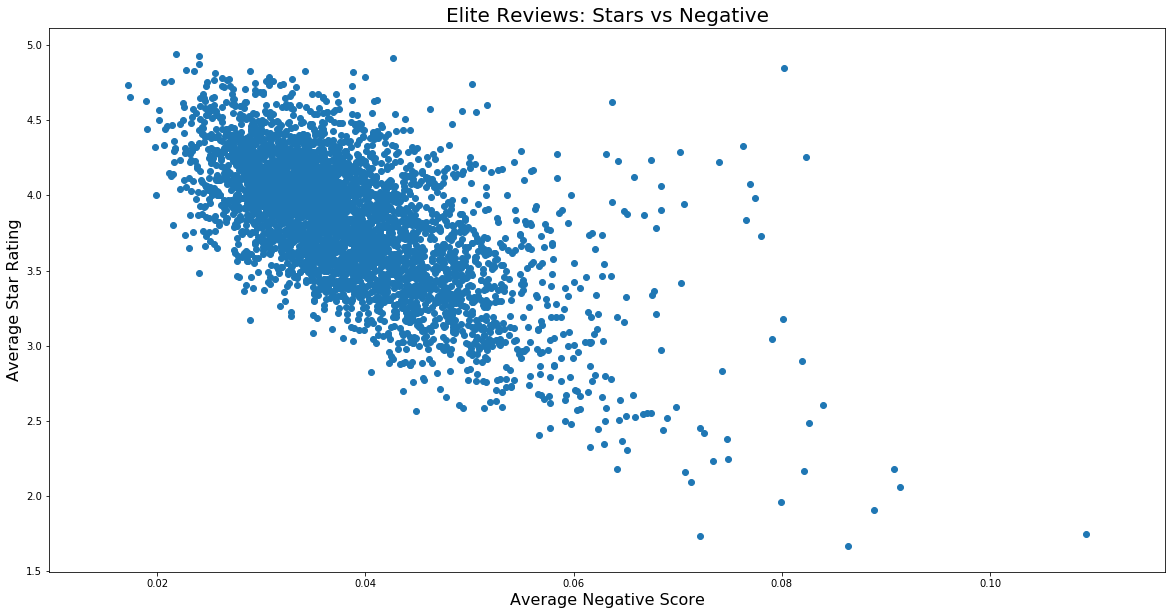

In [246]:
plt.figure(figsize=(20,10))
plt.scatter(avg_elite_reviews['Negative'], avg_elite_reviews['stars'])
plt.title('Elite Reviews: Stars vs Negative', fontsize = 20)
plt.xlabel('Average Negative Score', fontsize = 16)
plt.ylabel('Average Star Rating', fontsize = 16)
plt.savefig('avgeliteneg.png')
plt.show()

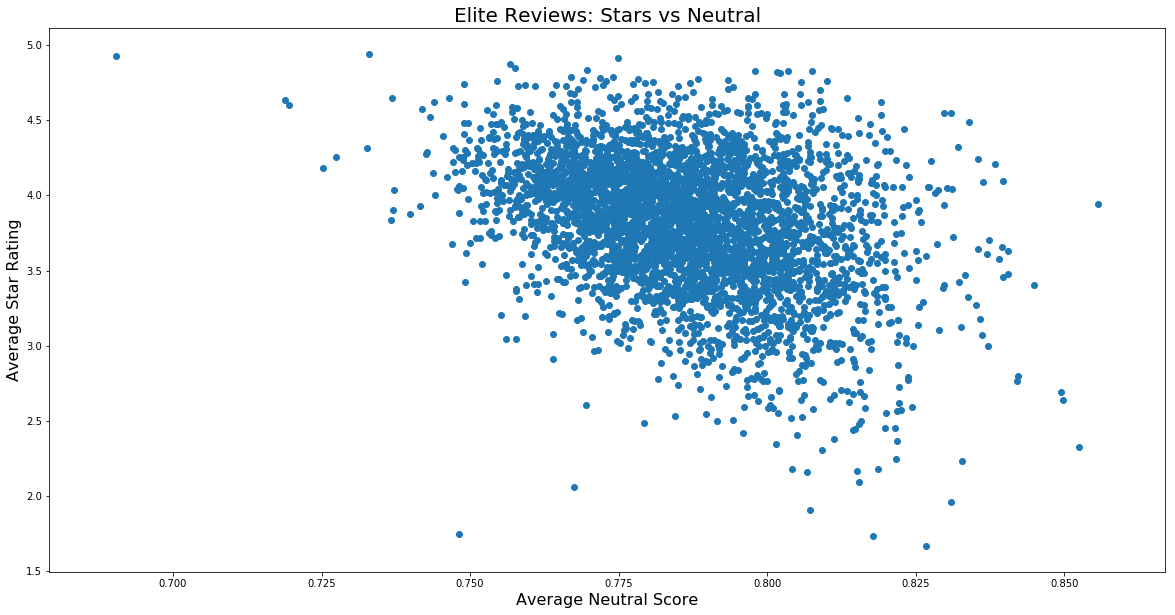

In [247]:
plt.figure(figsize=(20,10))
plt.scatter(avg_elite_reviews['Neutral'], avg_elite_reviews['stars'])
plt.title('Elite Reviews: Stars vs Neutral', fontsize = 20)
plt.xlabel('Average Neutral Score', fontsize = 16)
plt.ylabel('Average Star Rating', fontsize = 16)
plt.savefig('avgeliteneu.png')
plt.show()

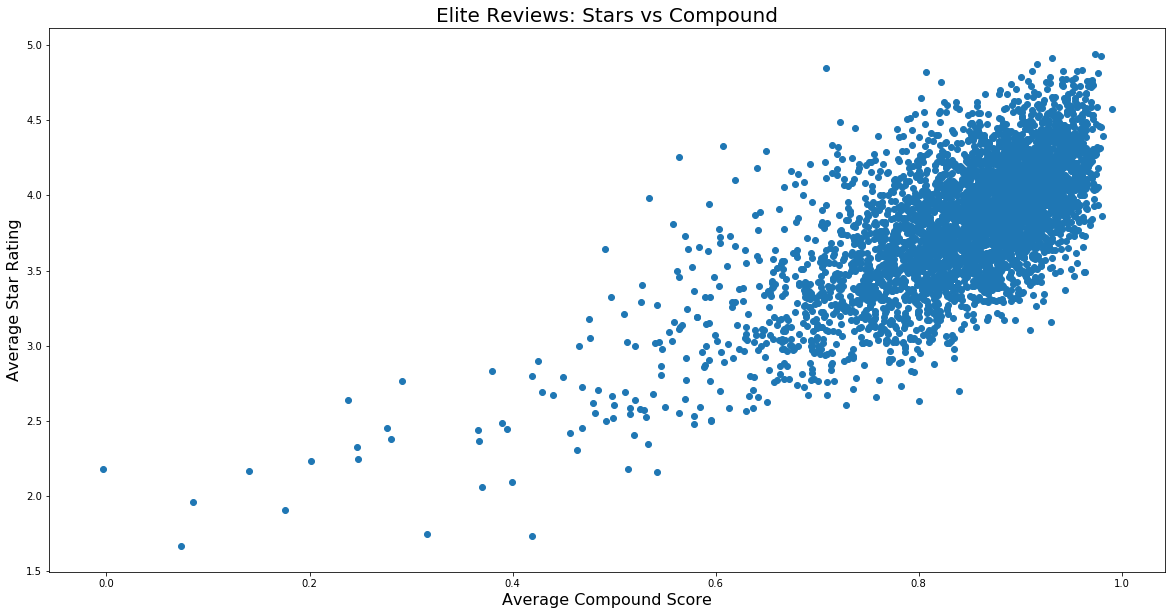

In [248]:
plt.figure(figsize=(20,10))
plt.scatter(avg_elite_reviews['Compound'], avg_elite_reviews['stars'])
plt.title('Elite Reviews: Stars vs Compound', fontsize = 20)
plt.xlabel('Average Compound Score', fontsize = 16)
plt.ylabel('Average Star Rating', fontsize = 16)
plt.savefig('avgelitecomp.png')
plt.show()

In [249]:
x_pos = avg_elite_reviews.iloc[:,1].values
x_neg = avg_elite_reviews.iloc[:,2].values
x_neu = avg_elite_reviews.iloc[:,3].values
x_comp = avg_elite_reviews.iloc[:,4].values
y = avg_elite_reviews.iloc[:,0].values

In [250]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)


In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [252]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.134e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:43:38   Log-Likelihood:                -699.16
No. Observations:                2921   AIC:                             1406.
Df Residuals:                    2917   BIC:                             1430.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.8610      0.444     10.946      0.0

In [253]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.087
Variance Score: 0.518


In [257]:
max(y_pred)

4.335794969424435

Remove compound from model

In [258]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1)), axis = 1)


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [260]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.406e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:45:05   Log-Likelihood:                -804.60
No. Observations:                2921   AIC:                             1615.
Df Residuals:                    2918   BIC:                             1633.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.1426      0.273     37.121      0.0

In [261]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.090
Variance Score: 0.501


Remove neutral from model

In [268]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)


In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [270]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.322e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:46:50   Log-Likelihood:                -893.81
No. Observations:                2921   AIC:                             1794.
Df Residuals:                    2918   BIC:                             1812.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3347      0.468      7.128      0.0

In [271]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.105
Variance Score: 0.418


Remove neg and neu from model

In [272]:
X = np.concatenate((x_pos.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)


In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [274]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.842e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:47:10   Log-Likelihood:                -1001.5
No. Observations:                2921   AIC:                             2007.
Df Residuals:                    2919   BIC:                             2019.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.5843      0.459     12.154      0.0

In [275]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.106
Variance Score: 0.413


Compound only

In [277]:
X = x_comp.reshape(-1,1)

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [279]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.507e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:48:19   Log-Likelihood:                -1073.6
No. Observations:                2921   AIC:                             2149.
Df Residuals:                    2920   BIC:                             2155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.5141      0.008    592.205      0.0

In [280]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.112
Variance Score: 0.381
